In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [10]:
def compute_mean_std_roc(label_list, prob_list):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i in range(10):
        fpr, tpr, _ = roc_curve(label_list.iloc[::,i], prob_list.iloc[::,i])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = roc_auc_score(label_list.iloc[::,i], prob_list.iloc[::,i])
        aucs.append(roc_auc)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    std_tpr = np.std(tprs, axis=0)
    # mean_auc = auc(mean_fpr, mean_tpr)
    mean_auc = np.round(np.mean(aucs), 4)
    std_auc = np.round(np.std(aucs), 4)
    
    return mean_fpr, mean_tpr, std_tpr, mean_auc, std_auc

### AUCROC plot

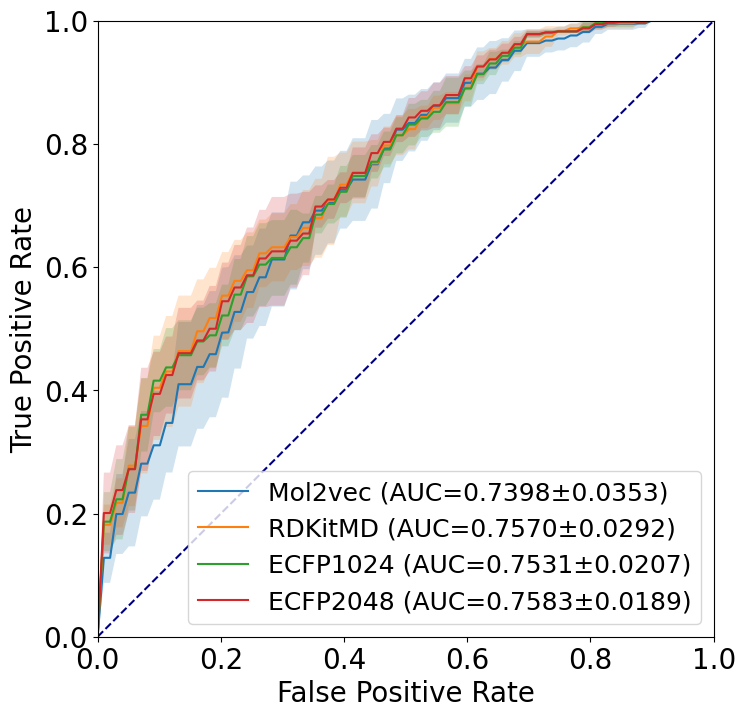

In [44]:
models = {'Mol2vec': [pd.read_csv("./results_sm/results_probs/ert_mol2vec_test_label_lists.csv"), 
                           pd.read_csv("./results_sm/results_probs/ert_mol2vec_probs_lists.csv")],
          'RDKitMD': [pd.read_csv("./results_sm/results_probs/ert_RDKitMD_test_label_lists.csv"),
                            pd.read_csv("./results_sm/results_probs/ert_RDKitMD_probs_lists.csv")], 
          'ECFP1024': [pd.read_csv("./results_sm/results_probs/ert_MorganFP1024_test_label_lists.csv"), 
                               pd.read_csv("./results_sm/results_probs/ert_MorganFP1024_probs_lists.csv")], 
          'ECFP2048': [pd.read_csv("./results_sm/results_probs/ert_MorganFP2048_test_label_lists.csv"), 
                               pd.read_csv("./results_sm/results_probs/ert_MorganFP2048_probs_lists.csv")]}

# Plot ROC curve for each model with error region
fig = plt.figure(figsize=(8, 8))

for model_name in models.keys():
    mean_fpr, mean_tpr, std_tpr, mean_auc, std_auc = compute_mean_std_roc(models[model_name][0], models[model_name][1])
    # plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC={mean_auc:.4f}±{std_auc:.4f})')
    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC={mean_auc:.4f}±{std_auc:.4f})')
    tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, alpha=0.2)

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Receiver Operating Characteristic (ROC) Curve with Error Regions')
plt.legend(loc="lower right", fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
fig.savefig("./results_sm/result_repeated/best_aucroc.pdf", bbox_inches='tight')

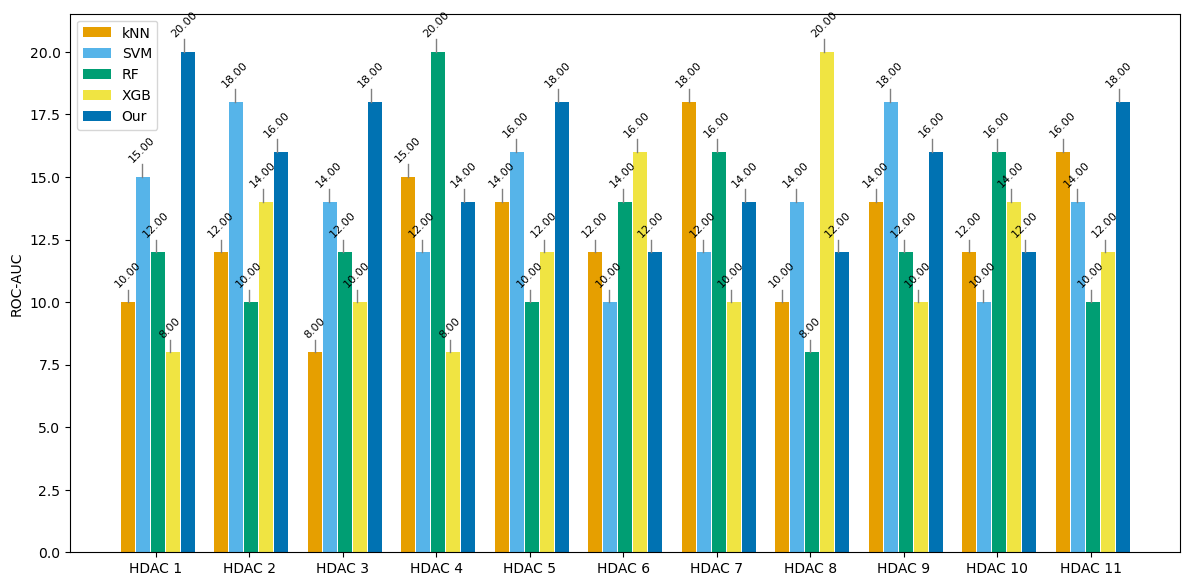

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu mẫu
data = [
    [10, 15, 12, 8, 20],
    [12, 18, 10, 14, 16],
    [8, 14, 12, 10, 18],
    [15, 12, 20, 8, 14],
    [14, 16, 10, 12, 18],
    [12, 10, 14, 16, 12],
    [18, 12, 16, 10, 14],
    [10, 14, 8, 20, 12],
    [14, 18, 12, 10, 16],
    [12, 10, 16, 14, 12],
    [16, 14, 10, 12, 18]
]

# Giá trị AUC mẫu
auc_values = [0.85, 0.92, 0.79, 0.88, 0.84]

methods = ['kNN', 'SVM', 'RF', 'XGB', 'Our']
HDAC_names = ['HDAC 1', 'HDAC 2', 'HDAC 3', 'HDAC 4', 'HDAC 5',
                 'HDAC 6', 'HDAC 7', 'HDAC 8', 'HDAC 9', 'HDAC 10', 'HDAC 11']

# Mã màu cho các cột
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cột
x = np.arange(len(HDAC_names))
width = 0.15
spacing = 0.01

for i, method in enumerate(methods):
    plt.bar(x + (i * (width + spacing)), [row[i] for row in data], width, label=method, color=colors[i])
    # plt.bar(x + i*width, [row[i] for row in data], width, label=method, color=colors[i])
    for j, value in enumerate([row[i] for row in data]):
        plt.text(x[j] + i*width, value + 0.5, f"{value:.2f}", ha='center', va='bottom', fontsize=8, rotation=45)
        plt.plot([x[j] + i*width, x[j] + i*width], [value, value + 0.5], color='gray', linestyle='-', linewidth=1)

plt.xticks(x + (len(methods)-1)*width/2, HDAC_names)
plt.ylabel('ROC-AUC')
plt.legend()
plt.tight_layout()
plt.show()